In [5]:
from sklearn.datasets import make_classification
import numpy as np
import pdb
from sklearn import metrics
from sklearn import cross_validation
from collections import Counter
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def euclidean_distance(a, b):
    return np.sqrt(np.dot(a - b, a - b))

def cosine_distance(a, b):
    return 1 - np.dot(a, b) / np.sqrt(np.dot(a, a) * np.dot(b, b))

class KNearestNeighbors(object):
    def __init__(self, k=5, distance=euclidean_distance):
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = np.zeros((X.shape[0], self.X_train.shape[0]))
        for i, x in enumerate(X):
            for j, x_train in enumerate(self.X_train):
                distances[i, j] = self.distance(x_train, x)
#         pdb.set_trace()
        top_k = y[distances.argsort()[:,:self.k]]  #sort and take top k
        result = np.zeros(X.shape[0])
        for i, values in enumerate(top_k):
            result[i] = Counter(values).most_common(1)[0][0]
        return result
    
    def score(self, y_true, y_pred):
        return sum(y_true == y_pred)/float(len(y_pred))

In [3]:
X, y = make_classification(n_features=4, n_redundant=0, n_informative=1,
                               n_clusters_per_class=1, class_sep=5,
                               random_state=5)
knn = KNearestNeighbors(3, cosine_distance)
knn.fit(X, y)
print knn.score(y, knn.predict(X))
print "\tactual\tpredict\tcorrect?"
for i, (actual, predicted) in enumerate(zip(y, knn.predict(X))):
    print "%d\t%d\t%d\t%d" % (i, actual, predicted, int(actual == predicted))

1.0
	actual	predict	correct?
0	1	1	1
1	1	1	1
2	0	0	1
3	0	0	1
4	1	1	1
5	1	1	1
6	0	0	1
7	1	1	1
8	0	0	1
9	0	0	1
10	0	0	1
11	1	1	1
12	0	0	1
13	1	1	1
14	1	1	1
15	1	1	1
16	0	0	1
17	1	1	1
18	0	0	1
19	0	0	1
20	0	0	1
21	0	0	1
22	0	0	1
23	0	0	1
24	1	1	1
25	0	0	1
26	0	0	1
27	0	0	1
28	1	1	1
29	1	1	1
30	1	1	1
31	1	1	1
32	1	1	1
33	1	1	1
34	0	0	1
35	0	0	1
36	1	1	1
37	0	0	1
38	1	1	1
39	0	0	1
40	1	1	1
41	0	0	1
42	0	0	1
43	1	1	1
44	0	0	1
45	1	1	1
46	0	0	1
47	0	0	1
48	0	0	1
49	0	0	1
50	0	0	1
51	0	0	1
52	0	0	1
53	0	0	1
54	1	1	1
55	0	0	1
56	1	1	1
57	1	1	1
58	1	1	1
59	0	0	1
60	1	1	1
61	1	1	1
62	1	1	1
63	1	1	1
64	1	1	1
65	1	1	1
66	1	1	1
67	1	1	1
68	1	1	1
69	1	1	1
70	0	0	1
71	1	1	1
72	0	0	1
73	1	1	1
74	0	0	1
75	1	1	1
76	0	0	1
77	1	1	1
78	0	0	1
79	1	1	1
80	1	1	1
81	0	0	1
82	0	0	1
83	1	1	1
84	1	1	1
85	1	1	1
86	0	0	1
87	1	1	1
88	0	0	1
89	1	1	1
90	0	0	1
91	0	0	1
92	0	0	1
93	0	0	1
94	1	1	1
95	0	0	1
96	1	1	1
97	1	1	1
98	0	0	1
99	0	0	1


###Visualizing plot boundaries

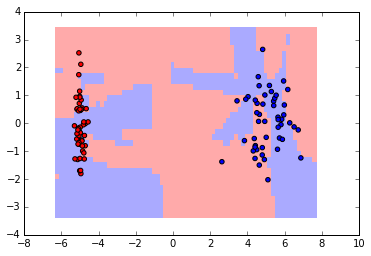

In [8]:
plotX, ploty = make_classification(n_features=2, n_redundant=0, n_informative=1,
                       n_clusters_per_class=1, class_sep=5, random_state=5)

knn = KNearestNeighbors(5, euclidean_distance)
knn.fit(plotX, ploty)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = 0.2

x_min, x_max = plotX[:, 0].min() - 1, plotX[:, 0].max() + 1
y_min, y_max = plotX[:, 1].min() - 1, plotX[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

test = np.c_[xx.ravel(), yy.ravel()]

# pdb.set_trace()

Z = knn.predict(test)
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.show()